In [1]:
from google.colab import drive
drive.mount('/content/drive/')

ModuleNotFoundError: No module named 'google.colab'

Công ty của bạn hiện nay đang muốn đẩy mạnh hoạt động kinh doanh bằng cách tập chung các chiến lược khác nhau cho các nhóm khách hàng khác nhau. Như vậy việc quan trọng là cần phân khách hàng thành các nhóm cụ thể dựa trên một số yếu tố nào đó. Nhiệm vụ của bạn là tìm các yếu tố đó và phân khách hàng vào các nhóm cụ thể

Bạn sẽ được cung cấp một bộ dữ liệu để thực hiện xây dựng mô hình phân nhóm khách hàng:

Thông tin các cột trong file dữ liệu:
* **InvoiceNo**: Id Hoá đơn
* **StockCode**: Id của các mặt hàng đã mua
* **Description**: Môt tả của mặt hàng
* **Quantity**: Số lượng của mặt hàng đã mua.
* **InvoiceDate**: Ngày mua
* **UnitPrice**: Giá của mặt hàng
* **CustomerID**: Id khách hàng đã mua hàng
* **Country**: Tên quốc gia của khách hàng



## Customer Segmentation:

Customer segmentation là quá trình phân chia khách hàng của công ty, doanh nghiệp thành các nhóm hoặc phân khúc khác nhau dựa trên các thuộc tính khác nhau của khách hàng. Quá trình phân khúc khách hàng dựa trên tìm kiếm sự khác biệt giữa hành vi hoặc đặc điểm của khách hàng.

Các mục tiêu và lợi ích chính của việc phân khúc khách hàng:

* **Tăng doanh thu:** Đây là mục tiêu rõ ràng nhất của bất kỳ nhiệm vụ phân khúc khách hàng nào
* **Hiểu khách hàng:** Một trong những mô hình kinh doanh được ngày càng phổ biến là “know your customer - KYC”, việc phân khúc được khách hàng sẽ giúp ích rất nhiều cho mô hình này.
* **Marketing:** Lợi ích dễ thấy nhất của việc phân khúc khách hàng là khả năng tập trung các tiếp thị một cách hiệu quả. Nếu một công ty biết các phân khúc khác nhau trong cơ sở khách hàng của mình, thì công ty có thể đưa ra các chiến dịch tiếp thị tốt hơn được thiết kế riêng cho phân khúc đó. Một mô hình phân khúc tốt cho phép hiểu rõ hơn về các yêu cầu của khách hàng và do đó làm tăng cơ hội thành công của bất kỳ chiến dịch tiếp thị nào do tổ chức phát triển.

* **Đặt vị trí thích hợp cho Sản phẩm** Một chiến lược phân khúc khách hàng tốt cũng có thể giúp công ty phát triển hoặc cung cấp các sản phẩm mới, hoặc một nhóm sản phẩm với nhau như một hình thức cung cấp kết hợp.
* **Tìm các phân khúc khách hàng tiềm ẩn:** Tìm ra phân khúc khách hàng có thể còn thiếu để xác định phân khúc khách hàng chưa được khai thác bằng cách tập trung vào các chiến dịch tiếp thị hoặc phát triển kinh doanh mới.

## Một số thuật ngữ, phương pháp sẽ được sử dùng trong bài ASM

#### 1. Clustering:
Phương pháp rõ ràng nhất để thực hiện phân khúc khách hàng là sử dụng các phương pháp Học máy không giám sát như phân cụm. Phương pháp này đơn giản nhất là thu thập càng nhiều dữ liệu về khách hàng càng tốt dưới dạng các tính năng hoặc thuộc tính và sau đó tìm ra các cụm khác nhau có thể thu được từ dữ liệu đó. Cuối cùng, chúng ta có thể tìm ra đặc điểm của các phân khúc khách hàng bằng cách phân tích các đặc điểm của các cụm.

#### 2.Exploratory Data Analysis - EDA

EDA là một cách khác để tìm ra phân khúc khách hàng. Điều này thường được thực hiện bởi các nhà phân tích có kiến ​​thức tốt về miền liên quan đến cả sản phẩm và khách hàng. Nó có thể được thực hiện một cách linh hoạt khi đưa ra các quyết đinh định trong một phân tích.

#### 3. Mô hình RFM đại diện cho giá trị khách hàng:

Vì tập dữ liệu của chúng ta được giới hạn trong lịch sử bán hàng và không bao gồm thông tin ẩn danh về khách hàng, nên chúng ta sẽ sử dụng mô hình dựa trên RFM. Mô hình RFM sẽ lấy các giao dịch của một khách hàng và tính toán ba thuộc tính thông tin quan trọng về mỗi khách hàng:
* **Recency**: Giá trị của mức độ gần đây một khách hàng đã mua hàng
* **Frequency**: Mức độ thường xuyên của các giao dịch của khách hàng
* **Monetary value**: Số tiền (hoặc bảng Anh trong bài ASM) của tất cả các giao dịch mà khách hàng đã thực hiện


# 1. Import thư viện và tải dữ liệu

#### **Yêu cầu 1: Import thành công dữ liệu và thư viện**

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
import datetime
import math
from scipy.stats import skew, norm, probplot, boxcox
from sklearn import preprocessing
import seaborn as sns
import numpy as np
import matplotlib.cm as cm
import plotly as py
from sklearn.metrics import silhouette_samples, silhouette_score      # silhouette: đo hệ số phù hợp của các mẫu với cụm của nó, chỉ số cao thì nó phù hợp với cụm (ít khác biết với các mẫu trong cụm)
import plotly.graph_objs as go
sns.set(style="ticks", color_codes=True, font_scale=1.5)
color = sns.color_palette()                                           # color_palette(): dùng 6 màu đặc trưng của seaborn là xanh lam, xanh lá, đỏ, tím, vàng, xanh da trời
sns.set_style('darkgrid')


Hàm dưới đây sẽ phục vụ cho việc vẽ các biểu đồ phân phối

In [3]:
def QQ_plot(data, measure):
    fig = plt.figure(figsize=(20,7))

    #Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(data)                        # Fit a normal distribution to the data; mu, sigma: trung bình, phương sai của phân phối

    #Kernel Density plot
    fig1 = fig.add_subplot(121)
    sns.distplot(data, fit=norm)                        #  sns.distplot(): xem phân phối chuẩn của 1 biến trong seaborn
    fig1.set_title(measure + ' Distribution ( mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma), loc='center')
    fig1.set_xlabel(measure)
    fig1.set_ylabel('Frequency')
    
    plt.tight_layout()                                 # tight_layout(): áp dụng cho toàn bộ đối tượng hình để làm sạch vùng đệm khoảng trắng
    plt.show()

In [4]:
df = pd.read_csv('D:/THUY/DA/6. Ung dung hoc may trong phan tich du lieu/ASM 3/Online Retail.csv')
print('df.shape: ',df.shape)
print(df.info())
df.head()


df.shape:  (541909, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# 2. Hiểu dữ liệu

#### **Yêu cầu 2: Hiển thị thông tin mô tả của bộ dữ liệu, bao gồm các giá trị như min, max, mean, std ...**

In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


#### **Yêu cầu 3: Trả lời các câu hỏi**

Nhìn vào bảng mô tả phía trên, chúng ta có thể thấy cột **Quantity** và **UnitPrice** có xuất hiện giá trị âm, điều này là không hợp lý trừ khi sẽ có những giao dịch dạng trả hàng thì sẽ khiến hai cột này có giá trị âm. Mục tiêu của chúng ta là phân khúc hàng nên chúng ta sẽ cần loại bỏ những giá trị này (chỉ cần quan tâm những khách hàng mua hàng, những khách hàng trả hàng chúng ta không cần quan tâm đến).

Bạn cần trả lời các câu hỏi sau:
* Kiểm tra xem có giao dịch nào có Quantity và  UnitPrice đều nhỏ hơn 0 hay không:
* Kiểm tra xem có bao nhiêu giao dịch có Quantity < 0 và Unitpirce = 0 hoặc ngược lại:
* ID các khách hàng ở trong các giao dịch ở ý trên là gì: 
* Tỷ lệ Quantity nhỏ hơn 0 trên tất cả các giao dịch là bao nhiêu:
* Tất cả các giao dịch với Quantity âm đều có Hoá đơn bắt đầu bằng ký tự gì:


In [10]:
# Kiểm tra xem có giao dịch nào có Quantity và UnitPrice đều nhỏ hơn 0 hay không:

df_n=df[(df['Quantity']<0) & (df['UnitPrice']<0)]
print('df_n.shape: ',df_n.shape)
if df_n.shape[0]==0:
    print('Không giao dịch nào có Quantity và UnitPrice đều nhỏ hơn 0')
else:
    print('Có tồn tại giao dịch mà Quantity và UnitPrice đều nhỏ hơn 0:',print(df_n))
  

df_n.shape:  (0, 8)
Không giao dịch nào có Quantity và UnitPrice đều nhỏ hơn 0


In [11]:
# Kiểm tra xem có bao nhiêu giao dịch có Quantity < 0 và Unitpirce = 0 hoặc ngược lại:

df_n1=df[((df['Quantity']<0) & (df['UnitPrice']==0)) & ((df['Quantity']==0) & (df['UnitPrice']<0))]
print('df_n1.shape: ',df_n1.shape)
if df_n1.shape[0]==0:
    print('Không có giao dịch nào có Quantity < 0 và Unitpirce = 0 hoặc ngược lại')
else:
    print('Có tồn tại giao dịch mà Quantity < 0 và Unitpirce = 0 hoặc ngược lại:',print(df_n1))
  

df_n1.shape:  (0, 8)
Không có giao dịch nào có Quantity < 0 và Unitpirce = 0 hoặc ngược lại


In [12]:
# ID các khách hàng ở trong các giao dịch ở ý trên là gì:

if df_n1.shape[0]==0:
    print('Không tồn tại khách hàng mà giao dịch có Quantity < 0 và Unitpirce = 0 hoặc ngược lại')
else:
    print('Có tồn tại khách hàng mà giao dịch có Quantity < 0 và Unitpirce = 0 hoặc ngược lại:',print(df_n1['CustomerID']))


Không tồn tại khách hàng mà giao dịch có Quantity < 0 và Unitpirce = 0 hoặc ngược lại


In [13]:
# Tỷ lệ Quantity nhỏ hơn 0 trên tất cả các giao dịch là bao nhiêu:

df_n2=df[df['Quantity']<0]
print('Tỷ lệ giao dịch có Quantity nhỏ hơn 0 trên tất cả các giao dịch là: ', np.round(df_n2.shape[0]/df.shape[0],3))


Tỷ lệ giao dịch có Quantity nhỏ hơn 0 trên tất cả các giao dịch là:  0.02


In [14]:
# Tất cả các giao dịch với Quantity âm đều có Hoá đơn bắt đầu bằng ký tự gì:

a=[]
b={}
for i in df_n2['InvoiceNo'].tolist():
    a.append(i[0])
#for i in a:
#    if i not in b:
#        b.append(i)
b=set(a)
print('b: ',b)
print('Tất cả các giao dịch với Quantity âm đều có Hoá đơn bắt đầu bằng một trong các ký tự: ',b)   


b:  {'C', '5'}
Tất cả các giao dịch với Quantity âm đều có Hoá đơn bắt đầu bằng một trong các ký tự:  {'C', '5'}


## 3. Data preparation

Khi chúng ta đã tạo tập dữ liệu giá trị khách hàng của mình, chúng ta sẽ thực hiện một số bước tiền xử lý dữ liệu. Trong trường hợp này, chúng ta sẽ sử dụng thuật toán phân cụm K-mean. Một trong những yêu cầu để thuật toán hoạt động đúng cách là chuẩn hoá giá trị các biến tính năng. Căn giữa trung bình của một giá trị là việc thay thế giá trị thực của biến bằng một giá trị chuẩn hóa, để biến có giá trị trung bình là 0 và phương sai là 1. Điều này đảm bảo rằng tất cả các biến đều nằm trong cùng một phạm vi.

Trong các dữ liệu có biến Price hay giá tiền thì thường những biến này có giá trị rất lớn. Để giải quyết vấn đề này, chúng ta sẽ biến đổi tất cả các biến trên thang log. Việc chuyển đổi này, cùng với việc chuẩn hóa, sẽ đảm bảo rằng đầu vào cho thuật toán là một tập hợp các giá trị có cùng khoảng giá trị.

Một điểm quan trọng về bước tiền xử lý dữ liệu là đôi khi chúng ta cần nó có thể đảo ngược được. Trong trường ASM này, chúng ta sẽ có kết quả phân cụm của dữ liệu được biến đổi theo log. Nhưng để ánh xạ được về dữ liệu ban đầu, chúng ta sẽ cần phải chuyển đổi ngược lại tất cả các biến để chúng ta lấy lại các số liệu RFM (Recency, Frequency, Monetary) thực tế. Điều này có thể được thực hiện bằng cách sử dụng các hàm của Python.


#### **Yêu cầu 4: Thực hiện lần lượt các yêu cầu**

* Xoá tất cả các hàng có CustomerID là null
* Xoá tất cả các hàng có Quantity < 0
* Lấy các hàng có UnitPrice > 0

In [5]:
#Viet mã vào các dòng bên dưới ứng với từng yêu cầu

#cs_df1 = df.dropna(subset=['CustomerID'])
cs_df1 = df[df.CustomerID.notnull()]                         # thêm 'inplace=True' sẽ báo lỗi
cs_df2 = cs_df1.drop(cs_df1[cs_df1.Quantity<0].index)        # thêm 'inplace=True' sẽ báo lỗi
cs_df = cs_df2[cs_df2.UnitPrice>0]                           # thêm 'inplace=True' sẽ báo lỗi

cs_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [6]:
cs_df.InvoiceDate = pd.to_datetime(cs_df.InvoiceDate)
cs_df['amount'] = cs_df.Quantity*cs_df.UnitPrice
cs_df.CustomerID = cs_df.CustomerID.astype('Int64')

cs_df

C:\Users\PC\AppData\Local\Temp\ipykernel_14680\2856662614.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs_df.InvoiceDate = pd.to_datetime(cs_df.InvoiceDate)
C:\Users\PC\AppData\Local\Temp\ipykernel_14680\2856662614.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs_df['amount'] = cs_df.Quantity*cs_df.UnitPrice
C:\Users\PC\AppData\Local\Temp\ipykernel_14680\2856662614.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


#### **Yêu cầu 5: Tạo biến Recency và in ra thông tin mô tả của biến recency vừa được tạo**

Như ở mục giới thiệu chúng ta đã nhắc đến mô hình RFM, bây giờ chúng ta sẽ thực hiện tạo biến Recency, chúng ta cần quyết định ngày tham chiếu cho phân tích. Thông thường, chúng ta sẽ sử dụng ngày giao dịch cuối cùng cộng với một ngày. Sau đó, chúng ta sẽ xây dựng biến recency là số ngày trước ngày tham chiếu khi khách hàng mua hàng lần cuối.

Ví dụ: Ngày cuối cùng mà xuất hiện đơn mua hàng của khách hàng là ngày thứ 10 như vậy chúng sẽ lấy 10 + 1 = 11. Sau đó chúng ta sẽ lấy số 11 trừ đi ngày cuối cùng mà mỗi khách hàng mua hàng. Giả sử lần cuối cùng mà khách hàng A mua hàng là ngày 5, và lần cuối cùng mà khách hàng B mua hàng là ngày 7 ta sẽ có Recency cho khách hàng A sẽ là 11 - 5 = 6, và Recency cho khách hàng B là 11 - 7 = 4

In [7]:
from datetime import timedelta
RefDate=cs_df.InvoiceDate.max() + timedelta(days=1)
#print(cs_df.InvoiceDate.max())
print('--- RefDate: ',RefDate)
#RefDate= '2011/12/10 12:50:00'
#RefDate=datetime.strptime('2011-12-10 12:50:00', '%Y-%m-%d %H:%M:%S')
recency=RefDate - cs_df.groupby('CustomerID')['InvoiceDate'].max()
#cs_df.groupby('CustomerID')['InvoiceDate'].max()
recency=pd.DataFrame(recency)
recency.InvoiceDate=recency.InvoiceDate.apply(lambda x:x.days)
print('--- recency: \n',recency)
#recency=recency.apply(np.float64)                      # chuyển định dạng timedelta -> float
recency1=recency.reset_index()                         # 'recency1' tạo thêm để ra thống kê có cột 'CustomerID'
recency1.describe().transpose()
#print(recency1)

--- RefDate:  2011-12-10 12:50:00
--- recency: 
             InvoiceDate
CustomerID             
12346               326
12347                 2
12348                75
12349                19
12350               310
...                 ...
18280               278
18281               181
18282                 8
18283                 4
18287                43

[4338 rows x 1 columns]


,count,mean,std,min,25%,50%,75%,max
CustomerID,4338.0,15300.408022,1721.808492,12346.0,13813.25,15299.5,16778.75,18287.0
InvoiceDate,4338.0,92.536422,100.014169,1.0,18.0,51.0,142.0,374.0


#### **Yêu cầu 6. Trực quan hoá biến Recency bằng cách sử dụng Hàm QQ_plot**

C:\Users\PC\AppData\Local\Temp\ipykernel_14680\1562473901.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, fit=norm)                        #  sns.distplot(): xem phân phối chuẩn của 1 biến trong seaborn


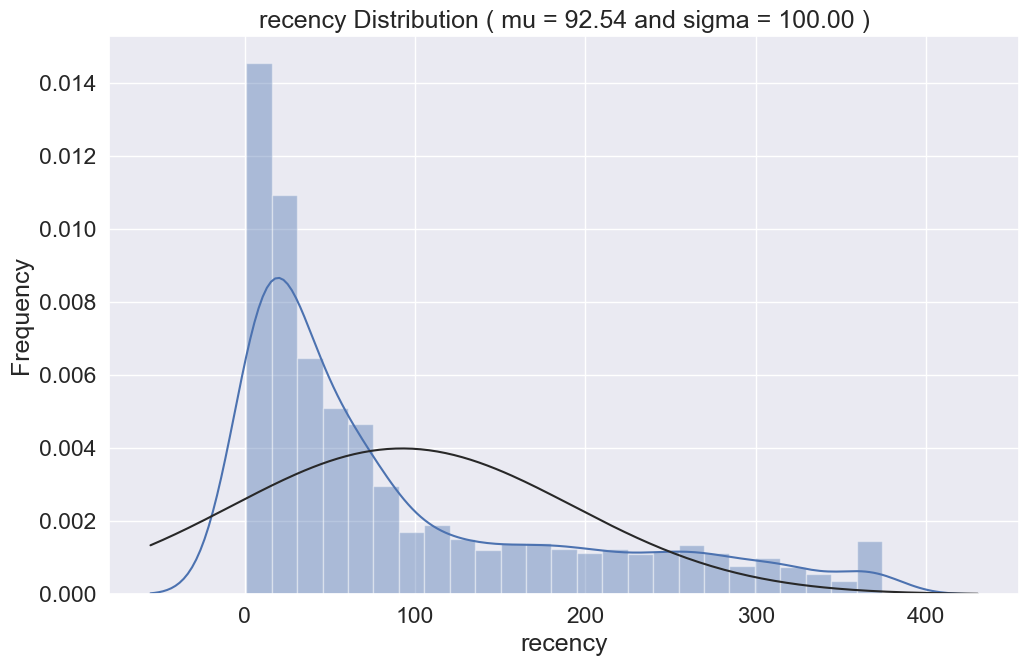

In [8]:
QQ_plot(recency.InvoiceDate, 'recency')

Từ biểu trên, chúng ta có thể thấy rằng phân phối của Recency bị lệch, có đỉnh ở bên trái và đuôi dài ở bên phải. Nó lệch khỏi phân phối chuẩn và có xu hướng dương.


#### **Yêu cầu 7: Tạo biến Frequency và in ra thông tin mô tả của biến Frequency vừa tạo**

Các bạn sẽ tính Frequency bằng cách đếm số đơn hàng mà mỗi khách hàng đã thực hiện mua (Lưu ý là các đơn hàng sẽ dạng distinct)

In [9]:
Frequency=cs_df.groupby('CustomerID')['InvoiceNo'].nunique()  # nunique(): Count number of distinct elements in specified axis
#print(Frequency)
Frequency=pd.DataFrame(Frequency)
Frequency.describe()


,InvoiceNo
count,4338.000000
mean,4.272015
std,7.697998
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,209.000000


#### **yêu cầu 8: Trực quan hoá Frequency với hàm QQ_plot**

C:\Users\PC\AppData\Local\Temp\ipykernel_14680\1562473901.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, fit=norm)                        #  sns.distplot(): xem phân phối chuẩn của 1 biến trong seaborn


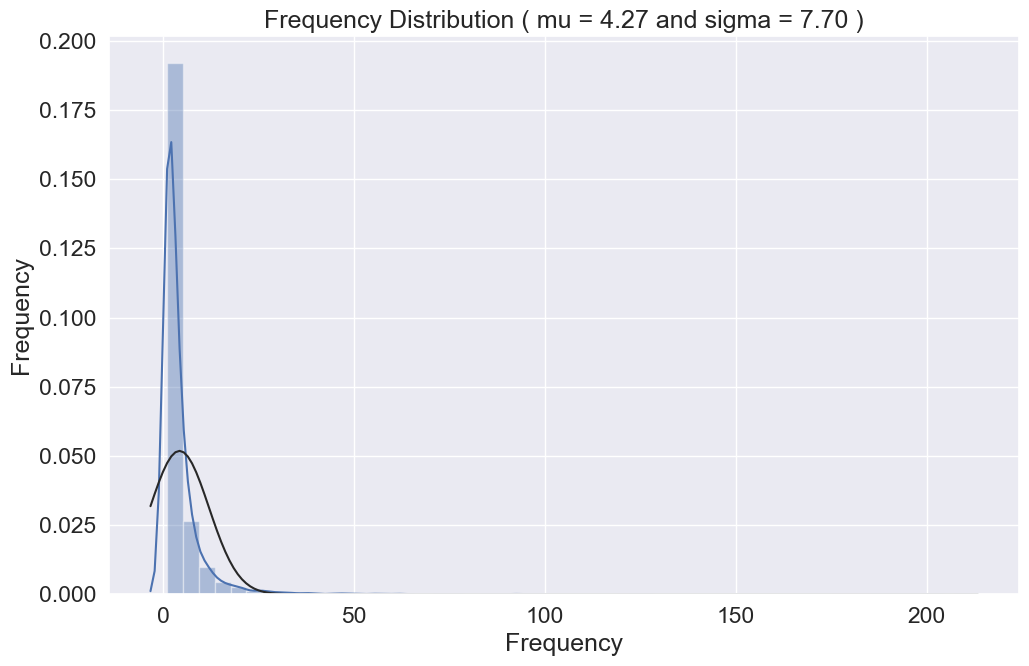

In [10]:
QQ_plot(Frequency.InvoiceNo, 'Frequency')

Từ biểu trên, chúng ta có thể thấy rằng phân phối tần suất bán hàng bị lệch, có đỉnh ở bên trái và đuôi dài ở bên phải. Nó lệch khỏi phân phối chuẩn và có xu hướng dương.

#### **yêu cầu 9: Tạo biến Monetary Value**



Để tính Monetary Value, chúng ta sẽ tính sum amount được group by theo CustomerID

In [11]:
MonetaryValue=cs_df.groupby('CustomerID')['amount'].sum()
#print(MonetaryValue)
MonetaryValue=pd.DataFrame(MonetaryValue)
MonetaryValue.describe()


,amount
count,4338.000000
mean,2054.266460
std,8989.230441
min,3.750000
25%,307.415000
50%,674.485000
75%,1661.740000
max,280206.020000


#### **Yêu cầu 10: Trực quan hoá Monetary Value với hàm QQ_plot**

C:\Users\PC\AppData\Local\Temp\ipykernel_14680\1562473901.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, fit=norm)                        #  sns.distplot(): xem phân phối chuẩn của 1 biến trong seaborn


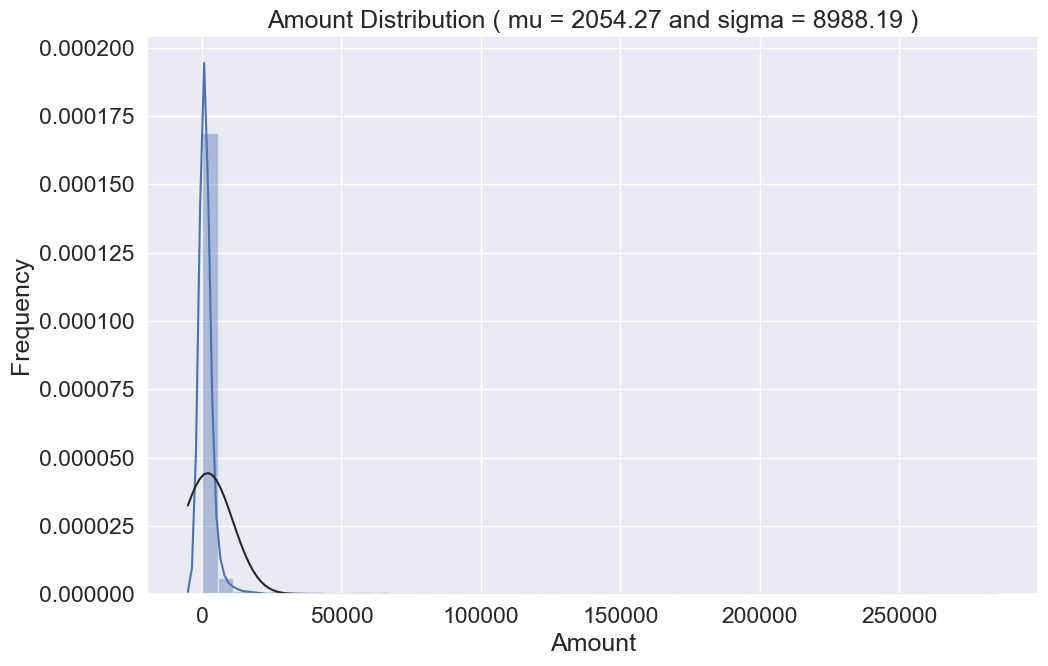

In [12]:
QQ_plot(MonetaryValue.amount, 'Amount')

Từ biểu trên, chúng ta có thể thấy rằng phân phối  Monetary Value bị lệch, có đỉnh ở bên trái và đuôi dài ở bên phải. Nó lệch khỏi phân phối chuẩn và có xu hướng dương.

#### **Yêu cầu 11: Hiển thị ra thông tin mô tả của cả ba biến recency, frequency, amount theo CustomerID**

In [13]:
describe=pd.concat([recency1.describe(), Frequency.describe(), MonetaryValue.describe()], axis=1)
describe.columns=['CustomerID','recency', 'frequency', 'amount']
#print(describe.info())
describe


,CustomerID,recency,frequency,amount
count,4338.0,4338.000000,4338.000000,4338.000000
mean,15300.408022,92.536422,4.272015,2054.266460
std,1721.808492,100.014169,7.697998,8989.230441
min,12346.0,1.000000,1.000000,3.750000
25%,13813.25,18.000000,1.000000,307.415000
50%,15299.5,51.000000,2.000000,674.485000
75%,16778.75,142.000000,5.000000,1661.740000
max,18287.0,374.000000,209.000000,280206.020000


#### **Yêu cầu 12: Scale RBM trên thang đo log sau đó chuẩn hoá lại với StandardScaler**

Gợi ý: Sử dụng apply trong pandas kết hợp với math.log


In [14]:
df_log_scaler=pd.concat([recency, Frequency, MonetaryValue], axis=1)
df_log_scaler.columns=['recency_log', 'frequency_log', 'amount_log']
#df_log_scaler=np.log(df_log_scaler)
df_log_scaler.recency_log = df_log_scaler.recency_log.apply(math.log)
df_log_scaler.frequency_log = df_log_scaler.frequency_log.apply(math.log)
df_log_scaler.amount_log = df_log_scaler.amount_log.apply(math.log)
df_log_scaler=StandardScaler().fit_transform(df_log_scaler)
df_log_scaler=pd.DataFrame(df_log_scaler)
df_log_scaler.columns=['recency_log', 'frequency_log', 'amount_log']
print(df_log_scaler)
df_log_scaler.describe().transpose()


      recency_log  frequency_log  amount_log
0        1.409894      -1.048610    3.698719
1       -2.146498       1.111836    1.410201
2        0.383971       0.490522    0.716419
3       -0.574674      -1.048610    0.698706
4        1.374758      -1.048610   -0.617446
...           ...            ...         ...
4333     1.298690      -1.048610   -1.106086
4334     0.999081      -1.048610   -1.743850
4335    -1.178605      -0.279044   -1.117365
4336    -1.662552       2.029655    0.837969
4337    -0.004422       0.171123    0.733896

[4338 rows x 3 columns]


,count,mean,std,min,25%,50%,75%,max
recency_log,4338.0,-1.048288e-16,1.000115,-2.630445,-0.612424,0.114707,0.829652,1.505796
frequency_log,4338.0,-9.991495e-17,1.000115,-1.048610,-1.048610,-0.279044,0.738267,4.882714
amount_log,4338.0,-7.010426e-16,1.000115,-4.179280,-0.684183,-0.060942,0.654244,4.721395


#### **Yêu cầu 13: Thực hiện vẽ biểu đồ Scatter và đưa ra nhận xét**

In [15]:
# Tạo df chứa các thông tin phục vụ cho vẽ biểu đồ:

df_a=pd.concat([recency, Frequency, MonetaryValue], axis=1)
df_a.columns=['recency', 'frequency', 'amount']
df_a.reset_index(inplace=True)                                                    # bỏ reset_index đi để python tự lấy index là số tự nhiên, sẽ match với 'df_log_scaler' theo index này ở hàm concat bên dưới 
#print(df_a)
customer_history_df=pd.concat([df_a, df_log_scaler], axis=1)
#customer_history_df.sort_values('amount_log', ascending=False, inplace=True)    # sort theo từng cột để xem khoảng giá trị trong cột
customer_history_df


,CustomerID,recency,frequency,amount,recency_log,frequency_log,amount_log
0,12346,326,1,77183.60,1.409894,-1.048610,3.698719
1,12347,2,7,4310.00,-2.146498,1.111836,1.410201
2,12348,75,4,1797.24,0.383971,0.490522,0.716419
3,12349,19,1,1757.55,-0.574674,-1.048610,0.698706
4,12350,310,1,334.40,1.374758,-1.048610,-0.617446
...,...,...,...,...,...,...,...
4333,18280,278,1,180.60,1.298690,-1.048610,-1.106086
4334,18281,181,1,80.82,0.999081,-1.048610,-1.743850
4335,18282,8,2,178.05,-1.178605,-0.279044,-1.117365
4336,18283,4,16,2094.88,-1.662552,2.029655,0.837969


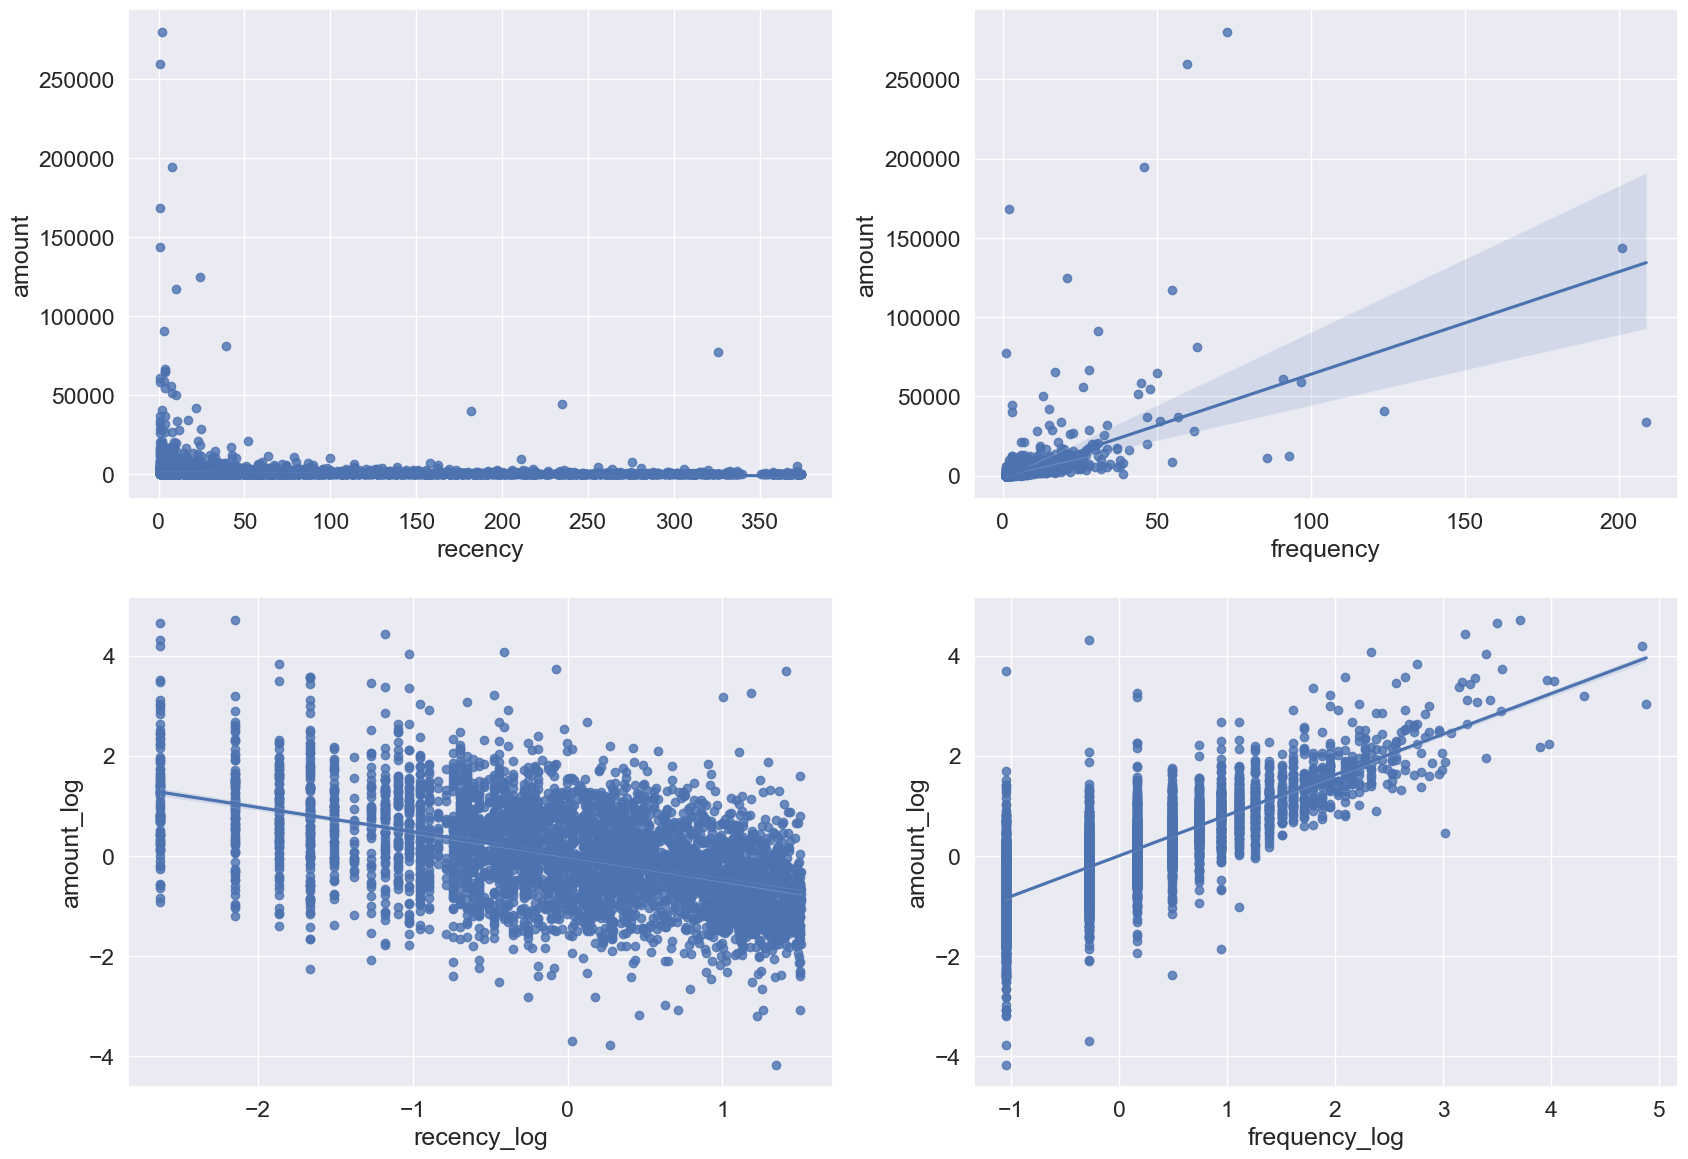

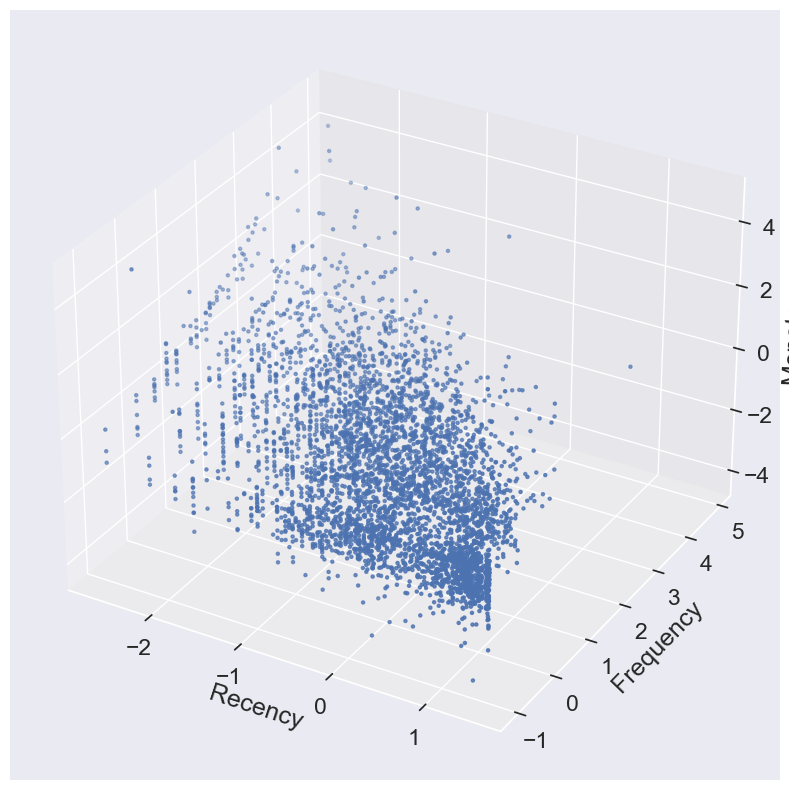

In [16]:
fig = plt.figure(figsize=(20,14))
f1 = fig.add_subplot(221); sns.regplot(x='recency', y='amount', data=customer_history_df)           # phần fig có 2 dòng, 2 cột, tổng 4 biểu  đồ nhỏ, 1: phía trên bên trái, 2: phía phải bên trái, 3: dưới bên trái, 4: dưới bên phải 
f1 = fig.add_subplot(222); sns.regplot(x='frequency', y='amount', data=customer_history_df)         # sns.regplot: vẽ đường hồi quy tuyến tính
f1 = fig.add_subplot(223); sns.regplot(x='recency_log', y='amount_log', data=customer_history_df)
f1 = fig.add_subplot(224); sns.regplot(x='frequency_log', y='amount_log', data=customer_history_df)

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

xs =customer_history_df.recency_log
ys = customer_history_df.frequency_log
zs = customer_history_df.amount_log
ax.scatter(xs, ys, zs, s=5)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

plt.show()


In [ ]:
Nhận xét:
+ biểu đồ giữa 'recency' và 'amount' cho thấy thời gian khách mua hàng lần cuối càng gần 0 thì giá trị hàng khách
đã mua càng lớn (khách quen có xu hướng mua nhiều hàng hơn), 'recency' trong khoảng 0 đến 50 đem lại doanh thu 
lớn nhất, đem đến doanh thu tới khoảng 50.000 mỗi khách
+ biểu đồ giữa 'frequency' và 'amount' cho thấy phần lớn khách hàng của công ty có tổng số đơn nhiều trong khoảng
0 đến 50, đem đến doanh thu tới khoảng 100.000 mỗi khách
+ khách hàng có 'recency' thấp và 'frequency' cao sẽ mang lại doanh thu lớn cho công ty

Chúng ta có thể thấy từ các biểu đồ ở trên, những người mua hàng với tần suất cao hơn (frequency) và  truy cập gần đây hơn (recency ) có xu hướng chi tiêu nhiều hơn (Monetary value) dựa trên xu hướng ngày càng tăng của số tiền với xu hướng tăng và giảm tương ứng cho Tần suất và Lần truy cập gần đây. .

# 4. Modeling - Kmean

#### **Phương pháp Elbow:**

Sử dụng phương pháp khuỷu tay (Elbow) để tìm số lượng cụm tối ưu. Ý tưởng đằng sau phương pháp khuỷu tay là xác định giá trị của k tại đó độ gấp khúc bắt đầu tăng nhanh nhất. Nếu k tăng, độ biến dạng của các cụm sẽ giảm, bởi vì các mẫu sẽ gần với trọng tâm cụm.

Phương pháp này xem xét phần trăm phương sai được giải thích như một hàm của số lượng cụm. Chính xác hơn, nếu ta vẽ biểu đồ phần trăm phương sai được giải thích bởi các cụm so với số lượng các cụm, các cụm đầu tiên sẽ bổ sung nhiều thông tin (giải thích nhiều phương sai), nhưng tại một số điểm, mức tăng cận biên sẽ giảm xuống (Số lượng cụm tăng, phương sai giảm), tạo ra một góc trong đồ thị, đây sẽ là điểm chọn số lượng cho cụm, do đó có "tiêu chí khuỷu tay". Phần trăm phương sai được giải thích là tỷ lệ giữa phương sai giữa nhóm với tổng phương sai, còn được gọi là F-test. Một biến thể nhỏ của phương pháp này vẽ biểu đồ độ cong của phương sai trong cụm

#### **Yêu cầu 14: Thực hiện đoạn mã bên dưới với X_scaled chính là dữ liệu sau khi chuẩn hoá, X_scaled sẽ có chiều như sau: (4338, 3)**

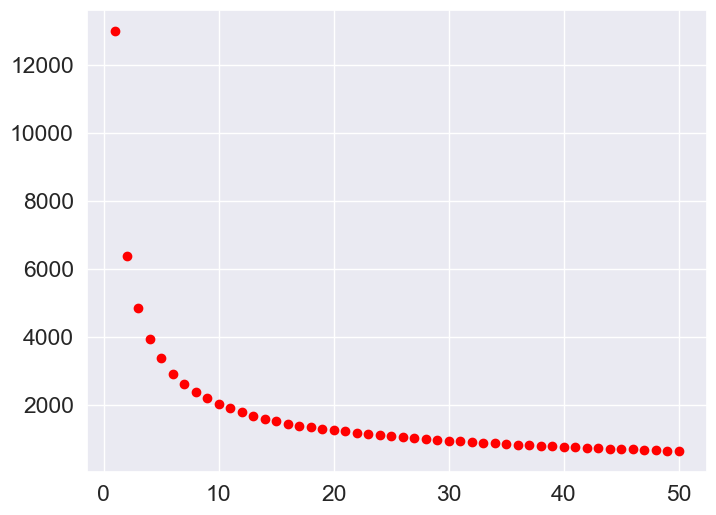

The best K sugest:  7


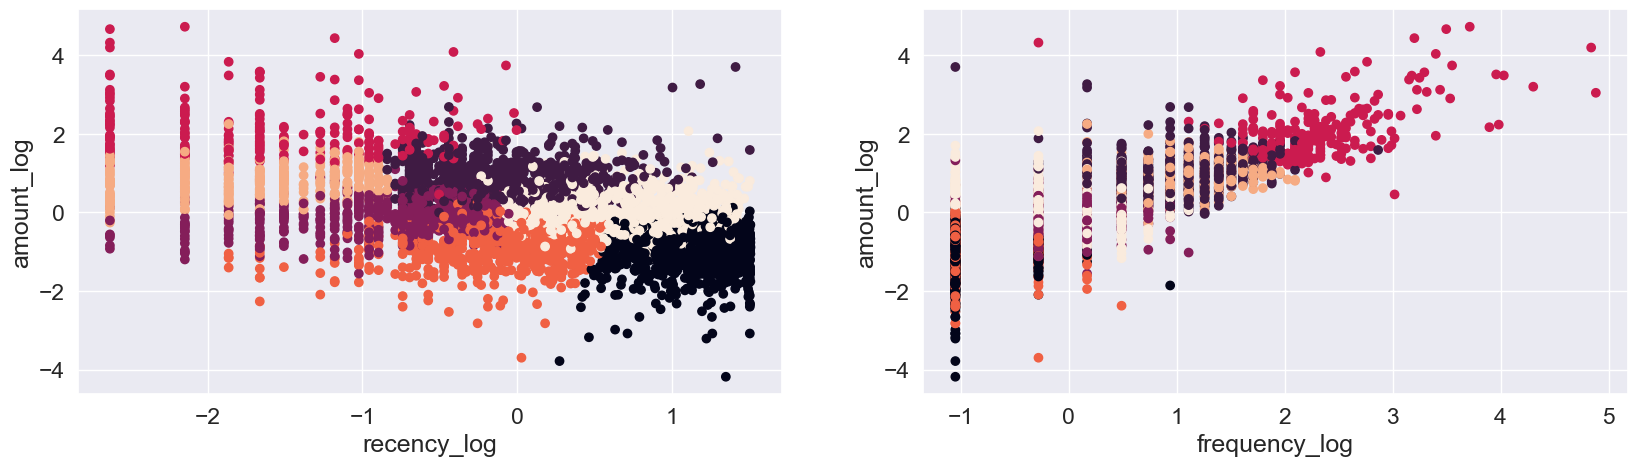

In [17]:
X_scaled = df_log_scaler
cl = 50
corte = 0.1

anterior = 100000000000000
cost = [] 
K_best = cl

for k in range (1, cl+1):
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    model = KMeans(
        n_clusters=k, 
        init='k-means++', #'random',
        n_init=10,
        max_iter=300,
        tol=1e-04,
        random_state=101)

    model = model.fit(X_scaled)

    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = model.labels_
 
    # Sum of distances of samples to their closest cluster center
    interia = model.inertia_
    if (K_best == cl) and (((anterior - interia)/anterior) < corte): K_best = k - 1
    cost.append(interia)
    anterior = interia

plt.figure(figsize=(8, 6))
plt.scatter(range (1, cl+1), cost, c='red')
plt.show()

# Create a kmeans model with the best K.
print('The best K sugest: ',K_best)
model = KMeans(n_clusters=K_best, init='k-means++', n_init=10,max_iter=300, tol=1e-04, random_state=101)

# Note I'm scaling the data to normalize it! Important for good results.
model = model.fit(X_scaled)

# These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
labels = model.labels_

# And we'll visualize it:
#plt.scatter(X_scaled[:,0], X_scaled[:,1], c=model.labels_.astype(float))
feature_vector=X_scaled.columns             #['recency_log', 'frequency_log', 'amount_log']
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(121)
plt.scatter(x = X_scaled.iloc[:,0], y = X_scaled.iloc[:,2], c=model.labels_.astype(float))
ax.set_xlabel(feature_vector[0])
ax.set_ylabel(feature_vector[2])
ax = fig.add_subplot(122)
plt.scatter(x = X_scaled.iloc[:,1], y = X_scaled.iloc[:,2], c=model.labels_.astype(float))
ax.set_xlabel(feature_vector[1])
ax.set_ylabel(feature_vector[2])

plt.show()


Khi sử dụng phương pháp Elbow bắt đầu với K bằng 3, chúng ta quan sát thấy với k = 7 thì độ giảm phương sai của cụm mạnh nhất với 10%. Từ đặc điểm này nên chúng ta sẽ bắt đầu đánh giá sâu hơn với k từ 3 đến 7. Chúng ta sẽ sử dụng phương pháp phân tích Silhouette.

**Bổ sung lý thuyết:**

Phân tích **Silhouette** trong phân cụm Kmeans

Phân tích Silhouette có thể được sử dụng để nghiên cứu khoảng cách giữa các cụm , như một chiến lược để định lượng chất lượng của việc phân nhóm hay phân cụm thông qua trực quan hoá để vẽ biểu đồ đo lường mức độ "chặt chẽ nhóm" của các mẫu trong các cụm. Biểu đồ Silhouette hiển thị thước đo mức độ gần của mỗi điểm trong một cụm với các điểm trong các cụm lân cận và do đó cung cấp cách để đánh giá các thông số như số lượng cụm một cách trực quan.

Cách phân tích này cũng có thể được áp dụng cho các thuật toán phân cụm khác ngoài k-means.

Hệ số Silhouette có phạm vi [-1, 1], và được tính bằng:
1. a(i) là khoảng cách trung bình giữa mẫu x(i) và tất cả các điểm khác trong cùng một cụm.
2. b(i) từ cụm gần nhất tiếp theo là khoảng cách trung bình giữa mẫu x(i) và tất cả các mẫu trong cụm gần nhất.
3. s(i) là sự khác biệt giữa a(i) và b(i) chia cho max(a(i), b(i)), như được hiển thị ở đây:

\begin{align} 
\text{s(i)} = \frac{b(i) - a(i)}{max\{a(i), b(i)\}} 
\end{align}

Một cách viết khác của công thức trên:

\begin{align}
        \text{s}(i) = \left\{
        \begin{array}{cl}
        1 - a(i)/b(i), & \text{if } a(i) < b(i) \\
        0, & \text{if } a(i) = b(i) \\
        b(i)/a(i) - 1, & \text{if } a(i) > b(i)
        \end{array}
        \right.
    \end{align}

Trong đó:
* Nếu gần +1, có nghĩa rằng mẫu ở xa các cụm lân cận.
* Giá trị cao chỉ ra rằng đối tượng được đối sánh tốt với cụm riêng của nó và đối sánh kém với các cụm lân cận.
* Nếu hầu hết các đối tượng có giá trị cao, thì cấu hình phân cụm là thích hợp.
* Nếu nhiều điểm có giá trị thấp hoặc âm, thì cấu hình phân cụm có thể có quá nhiều hoặc quá ít cụm.
* Giá trị 0 cho biết mẫu nằm trên hoặc rất gần ranh giới quyết định giữa hai cụm lân cận
* Giá trị âm chỉ ra rằng những mẫu đó có thể đã được chỉ định vào sai nhóm.

K được coi là không tốt khi các cụm có điểm Silhouette dưới trung bình hoặc có sự biến động lớn về kích thước của các ô Silhouette. K được coi là tốt khi tất cả các ô có độ dày tương tự hoặc không khác nhau nhiều hay nói cách khác tất cả các ô có kích thước tương tự.

Mặc dù chúng ta phải lưu ý rằng trong một số trường hợp và tình huống, đôi khi chúng ta có thể phải loại bỏ giải thích toán học do thuật toán đưa ra và xem xét mức độ phù hợp kinh doanh của kết quả thu được.

Hãy xem dữ liệu của chúng ta hoạt động như thế nào đối với từng giá trị K (3, 5 và 7) trong điểm Silhouette của mỗi cụm, cùng với trọng tâm của mỗi cụm được được đánh dấu trong các biểu đồ scatter, chúng ta sẽ phân cụm với 3 biến đầu vào là amount_log, recency_log, frequency_log nhưng sẽ hiển thị trên scatter theo từng cặp (amount_log, recency_log) và (amount_log, frequency_log)



#### **Yêu cầu 15: Chạy thành công đoạn mã bên dưới:**

In [38]:
#cluster_centers
#A=( -1.12864789,  1.4843942 ,  1.33183133)
#print(A in df_log_scaler)
#df_log_scaler

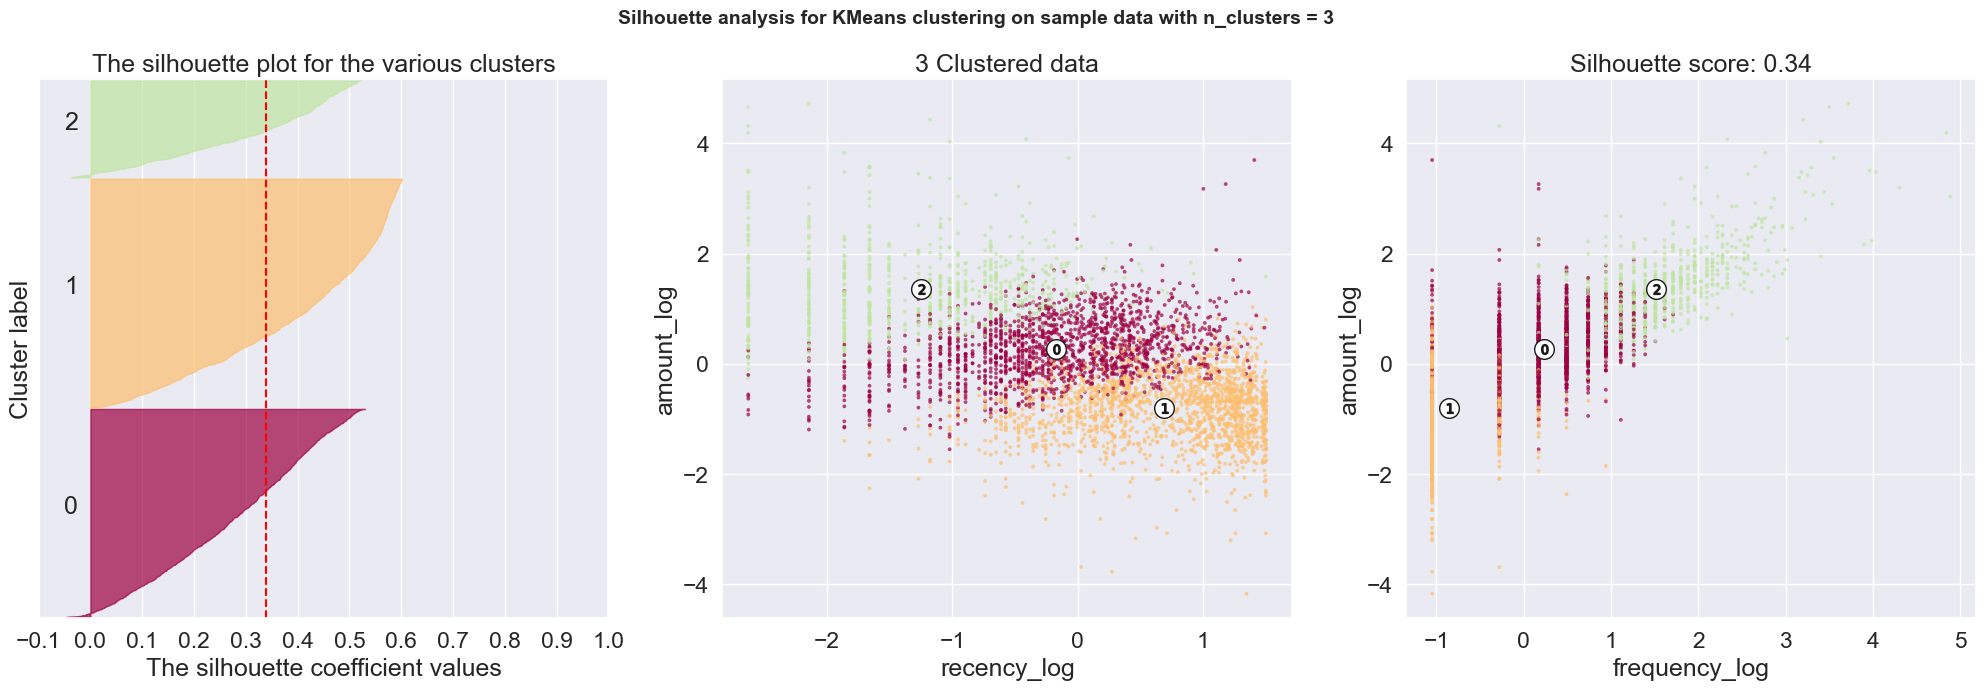

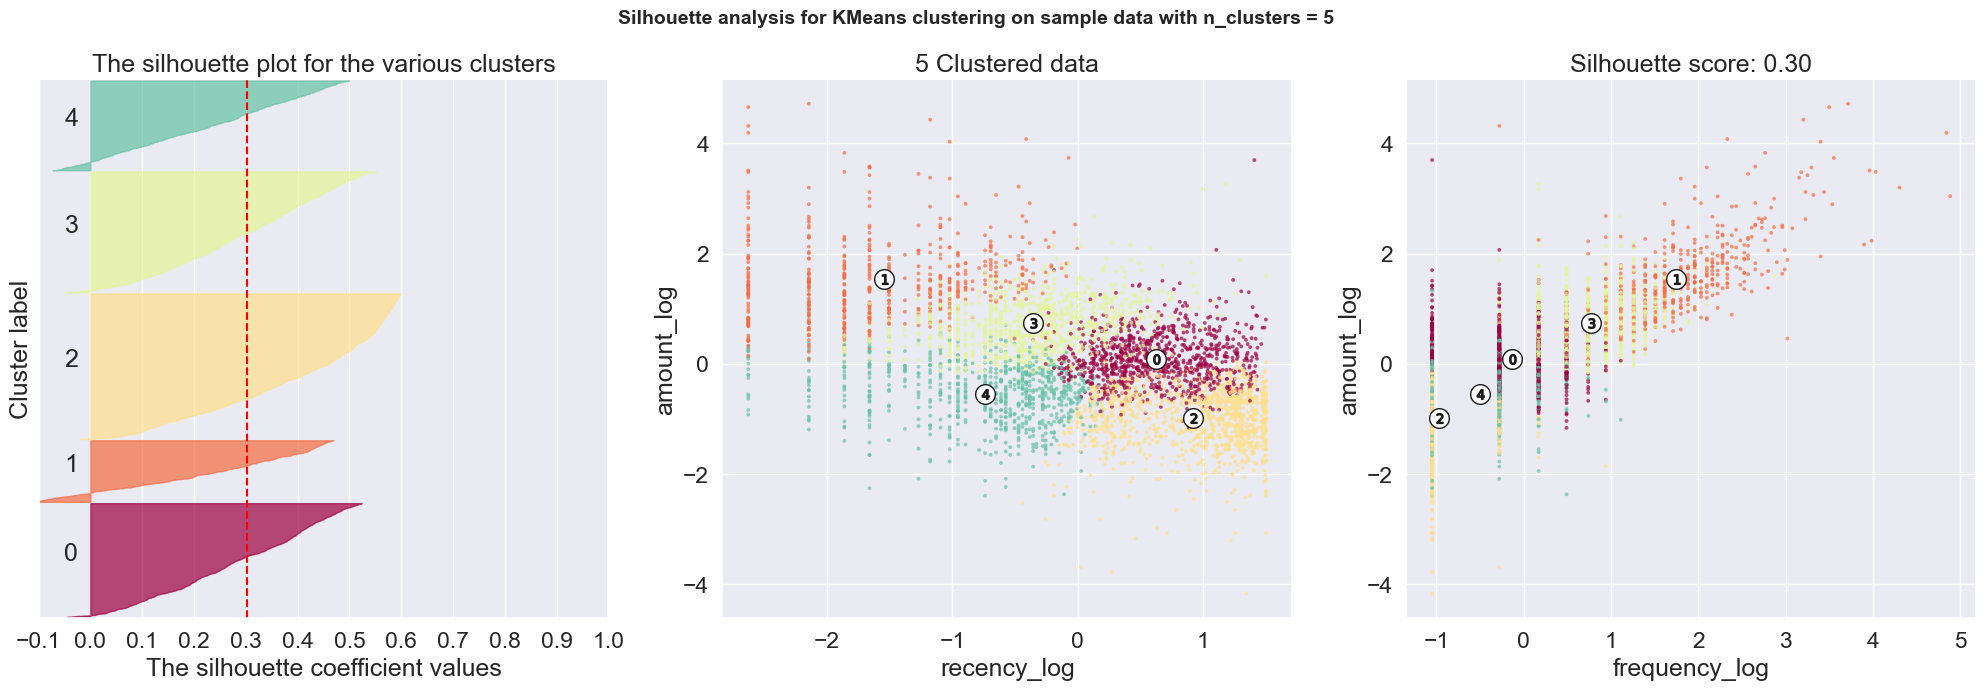

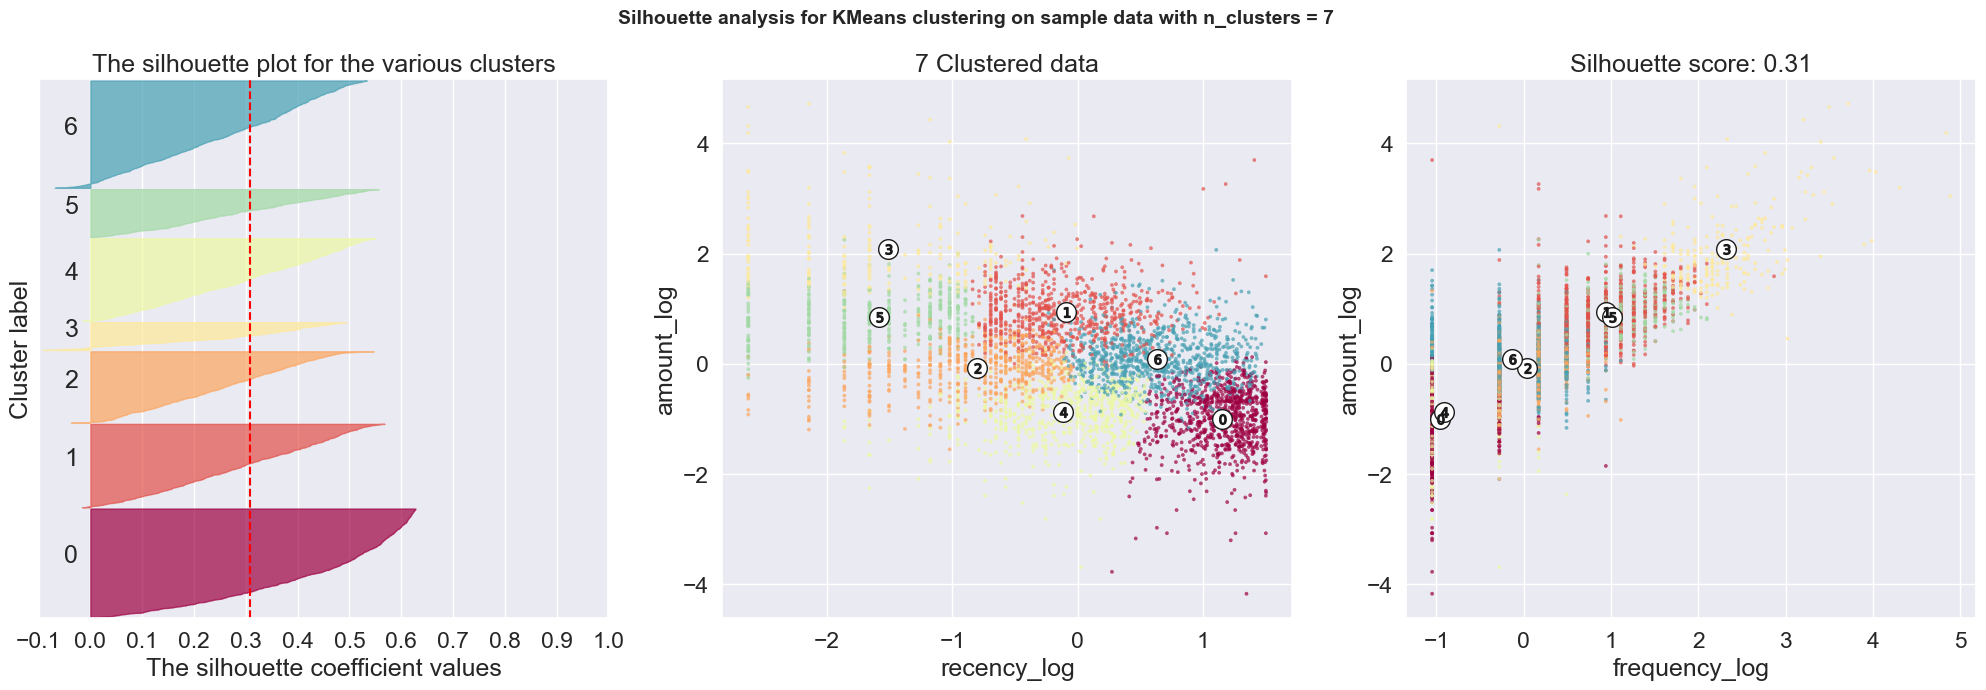

In [18]:
cluster_centers = dict()                                    # khai báo biến dạng dict

for n_clusters in range(3,K_best+1,2):                      # range(a,b,c): lấy các số từ 'a' đến <b, các số cách nhau 'c' giá trị 
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)               # fig,a =  plt.subplots(2,2): tạo hình có 4 biểu đồ nhỏ: a[0][0]: trên trái, a[0][1]: trên phải, a[1][0]: dưới trái, a[1][1]: dưới phải
    fig.set_size_inches(25, 7)                              # set the figure size in inches
    ax1.set_xlim([-0.1, 1])                                 # giới hạn giá trị trục x trong [0.1: 1]
    ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])       # len(X_scaled)=4338

    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10,max_iter=300, tol=1e-04, random_state=101)         # default in KMeans function: n_clusters: 8; init: k-means++, n_init: 10, max_iterint: 300, tol: 1e-4  
    cluster_labels = clusterer.fit_predict(X_scaled)                                                                         # fit_predict(x) = fit(x).predict(x)

    silhouette_avg = silhouette_score(X = X_scaled, labels = cluster_labels)
    cluster_centers.update({n_clusters :{'cluster_center':clusterer.cluster_centers_,                            # update(): insert the specified items to the dictionary
                                         'silhouette_score':silhouette_avg,
                                         'labels':cluster_labels}
                           })

    sample_silhouette_values = silhouette_samples(X = X_scaled, labels = cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)                                  # colors = plt.cm.Spectral() = colors = plt.get_cmap('Spectral')(): access the Spectral colormap
        ax1.fill_betweenx(np.arange(y_lower, y_upper),                              # matplotlib.pyplot.fill_betweenx(): fill area between two vertical curves. Two points (x1, y) and (x2, y) define the curves
                          0, ith_cluster_silhouette_values, 
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))                     # Axes.text(): add the text s to the axes at location x, y
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")                      # Axes. axvline():  add a vertical line across the axis, đường này là chỉ số silhouette score
    ax1.set_yticks([])                                                              # Axes.set_yticks(): Set the y axis' tick locations and optionally labels
    ax1.set_xticks([-0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    
    centers = clusterer.cluster_centers_
    feature_vector=X_scaled.columns             #['recency_log', 'frequency_log', 'amount_log']                                    
    y = 2
    x = 0
    ax2.scatter(X_scaled.iloc[:, x], X_scaled.iloc[:, y], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')   
    ax2.scatter(centers[:, x], centers[:, y], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[x], c[y], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    ax2.set_title("{} Clustered data".format(n_clusters))                                                      # print("For only {price:.2f} dollars!".format(price = 49)) -> kq: For only 49.00 dollars! 
    ax2.set_xlabel(feature_vector[0])
    ax2.set_ylabel(feature_vector[2])

    x = 1
    ax3.scatter(X_scaled.iloc[:, x], X_scaled.iloc[:, y], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')   
    ax3.scatter(centers[:, x], centers[:, y], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax3.scatter(c[x], c[y], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    ax3.set_title("Silhouette score: {:1.2f}".format(cluster_centers[n_clusters]['silhouette_score']))          #{:1.2f}".format(): số thập phân dạng a.bc
    ax3.set_xlabel(feature_vector[1])
    ax3.set_ylabel(feature_vector[2])
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()


#### **Yêu cầu 16: Từ hình ảnh trực quan ở yêu cầu 15 hãy đưa ra một số nhận xét chung**

In [ ]:
Theo lý thuyết thì Silhouette score có giá trị trong khoảng [-1,1], hệ số càng cao càng tốt. 
+ Các cụm của recency tập trung vào tâm hơn so với các cụm của frequency, các cụm của frequency rời rạc
+ Với 3 trường hợp n_clusters =3,5,7 ở trên thì hệ số Silhouette score dương (~ 0.3), nhìn trên biểu đồ thấy rằng đều thấp hơn mức trung bình
(đường thẳng vline chưa nằm về phía nửa bên phải biểu đồ) -> Cả 3 lựa chọn K đều chưa tốt.
+ Nhìn vào các biểu đồ 'The silhouette coefficient values' (bên trái), thấy rằng kích thước các ô đồng đều nhất với n_clusters=5, chênh lệch nhất với n_clusters=3
-> Nếu không dùng phương pháp Elbow mà dùng Silhouette score thì n_clusters=5 là tối ưu nhất


##  Clusters Center

Hãy xem xét các giá trị trung tâm cụm được ánh xạ ngược lại từ các cụm tính trên thang đo log và Stardartcaler

#### **Yêu cầu 17: Chạy thành công đoạn mã bên dưới để hiển thị các tâm cụm**

In [19]:
features = ['recency',  'frequency', 'amount']
for i in range(3,K_best+1,2):
    print("for {} clusters the silhouette score is {:1.2f}".format(i, cluster_centers[i]['silhouette_score']))
    print("Centers of each cluster:")
    cent_transformed = StandardScaler().fit(df_log_scaler).inverse_transform(cluster_centers[i]['cluster_center'])      # inverse_transform() sd thông tin StandardScaler().fit(df) chứ ko phải StandardScaler().fit_transform(df) 
    #cent_transformed = scaler.inverse_transform(cluster_centers[i]['cluster_center'])
    print(pd.DataFrame(np.exp(cent_transformed),columns=features))
    print('-'*50)


for 3 clusters the silhouette score is 0.34
Centers of each cluster:
    recency  frequency    amount
0  0.838729   1.262306  1.305301
1  1.987908   0.427463  0.445572
2  0.285148   4.566647  3.848492
--------------------------------------------------
for 5 clusters the silhouette score is 0.30
Centers of each cluster:
    recency  frequency    amount
0  1.863339   0.874891  1.091786
1  0.213165   5.737310  4.646827
2  2.515073   0.380005  0.370095
3  0.698305   2.150949  2.077396
4  0.478364   0.608811  0.580595
--------------------------------------------------
for 7 clusters the silhouette score is 0.31
Centers of each cluster:
    recency  frequency    amount
0  3.167719   0.383273  0.366526
1  0.909099   2.563078  2.576178
2  0.447423   1.032775  0.922521
3  0.219346  10.101616  8.077231
4  0.891639   0.401604  0.413751
5  0.204585   2.735447  2.328619
6  1.888326   0.874015  1.092800
--------------------------------------------------


# 5. Clusters Insights

#### **Yêu cầu 18: Phân tích với từng K**

Gợi ý: Các bạn hãy nhận xét đặc điểm của từng từng cụm đối với từng K



Với các ô và tâm ở các đơn vị chính xác, chúng ta hãy xem một số thông tin chi tiết theo từng nhóm cụm:

* Trường hợp có 3 cluster:
* Trường hợp có 5 cluster:
* Trường hợp có 7 cluster:






#6.  Tìm hiểu sâu về các cụm:
Để đi sâu hơn về đặc điểm của các cụm và tìm ra chất lượng của những khác biệt giữa các cụm, chúng ta có thể gắn nhãn dữ liệu của mình bằng nhãn cụm tương ứng và sau đó trực quan hóa những tính năng để tìm sự khác biệt. 

In [ ]:
Nhận xét:
1. K=3,5,7 thì cụm trong các trường hợp K này có số lượng khách hàng lớn nhất là 1,4,2
2. K=3,5,7 thì cụm trong các trường hợp K này có số lượng khách hàng nhỏ nhất là 2,2,0
3. Tỷ lệ số lượng khách hàng giữa các trường hợp xếp theo tự đồng đều giảm dần ứng với K=5,3,7
4. K=7: cụm số 0,2 có tỷ lệ số lượng khách hàng rất nhỏ
5. Trường hợp có 3 cluster: xem thống kê df 'Statistic for clusters in K= 3'-yêu cầu 20: mean, std chênh lệch lớn giữa các cụm
6. Trường hợp có 5 cluster: xem thống kê df 'Statistic for clusters in K= 5'-yêu cầu 20: mean, std chênh lệch nhỏ hơn so với trường hợp 3 cluster, các std có giá trị nhỏ
7. Trường hợp có 7 cluster: xem thống kê df 'Statistic for clusters in K= 7'-yêu cầu 20: mean, std chênh lệch lớn giữa các cụm
8. Với mọi K thì thấy rằng giá trị mua hàng của các khách hàng có sự phân hóa rõ rệt (khác biệt lớn về min, max từng cụm)
9. Các cụm khách hàng khác biệt không nhỏ về số lượng, chất lượng (giá trị mua hàng) -> công ty cần tập trung vào cụm khách hàng tạo ra nguồn doanh thu lớn cho công ty
10.Công ty có 1 lượng nhỏ khách hàng mang lại doanh thu lớn đột biến, là giá trị ngoại lai

#### **Yêu cầu 19: Viết mã để trực quan hoá tỷ lệ khách hàng trong từng cụm ứng với mỗi K**

Khi chúng ta đã gán nhãn cho từng khách hàng, nhiệm vụ tiếp theo khá đơn giản. Bây giờ chúng ta sẽ hiểu một cách tóm tắt về khách hàng trong mỗi nhóm khác nhau như thế nào. Nếu có thể hình dung thông tin này, chúng ta sẽ có thể tìm ra sự khác biệt trong các nhóm khách hàng và từ đó có thể sửa đổi chiến lược bán hàng marketing trên cơ sở những khác biệt đó.

In [20]:
# Tạo df thêm các cột cho phân loại Clusters:
customer_history_df1=customer_history_df.copy()
for i in range(3,K_best+1,2):
    customer_history_df1['clusters_'+str(i)]=cluster_centers[i]['labels']
customer_history_df1


,CustomerID,recency,frequency,amount,recency_log,frequency_log,amount_log,clusters_3,clusters_5,clusters_7
0,12346,326,1,77183.60,1.409894,-1.048610,3.698719,0,0,1
1,12347,2,7,4310.00,-2.146498,1.111836,1.410201,2,1,5
2,12348,75,4,1797.24,0.383971,0.490522,0.716419,0,3,1
3,12349,19,1,1757.55,-0.574674,-1.048610,0.698706,0,4,2
4,12350,310,1,334.40,1.374758,-1.048610,-0.617446,1,2,0
...,...,...,...,...,...,...,...,...,...,...
4333,18280,278,1,180.60,1.298690,-1.048610,-1.106086,1,2,0
4334,18281,181,1,80.82,0.999081,-1.048610,-1.743850,1,2,0
4335,18282,8,2,178.05,-1.178605,-0.279044,-1.117365,0,4,2
4336,18283,4,16,2094.88,-1.662552,2.029655,0.837969,2,1,5


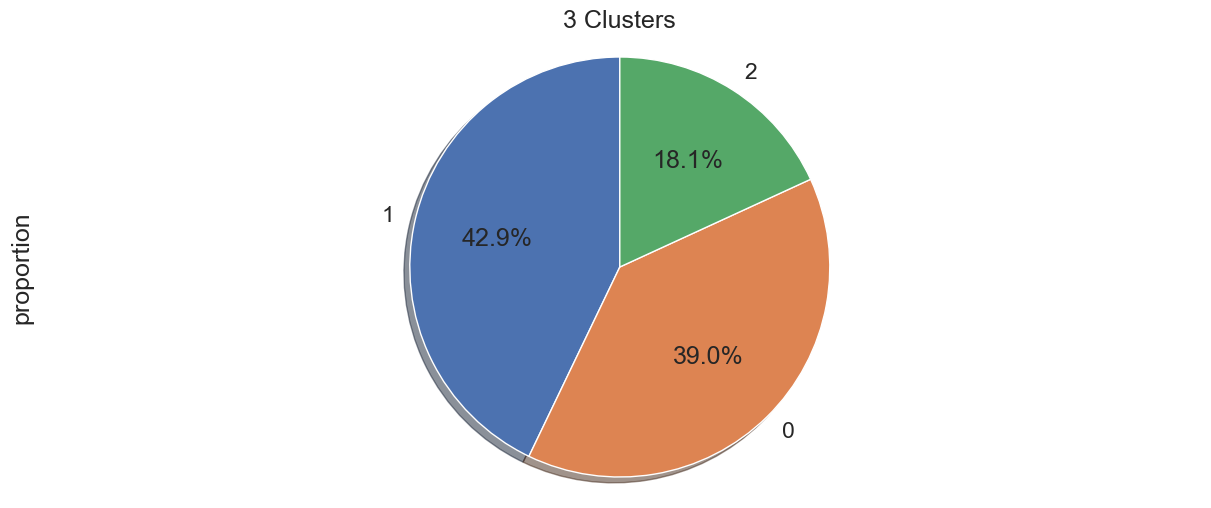

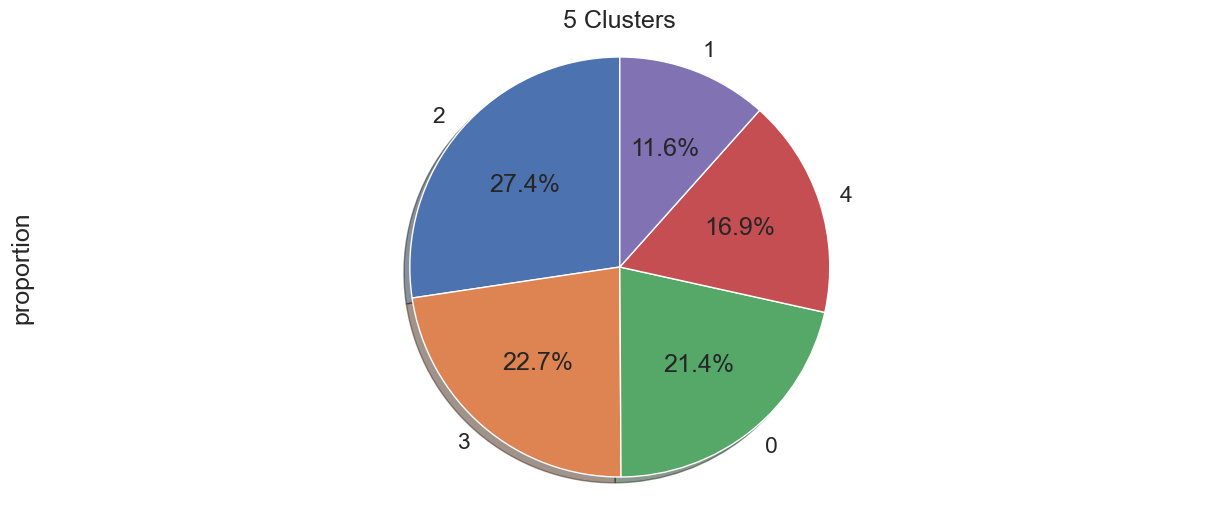

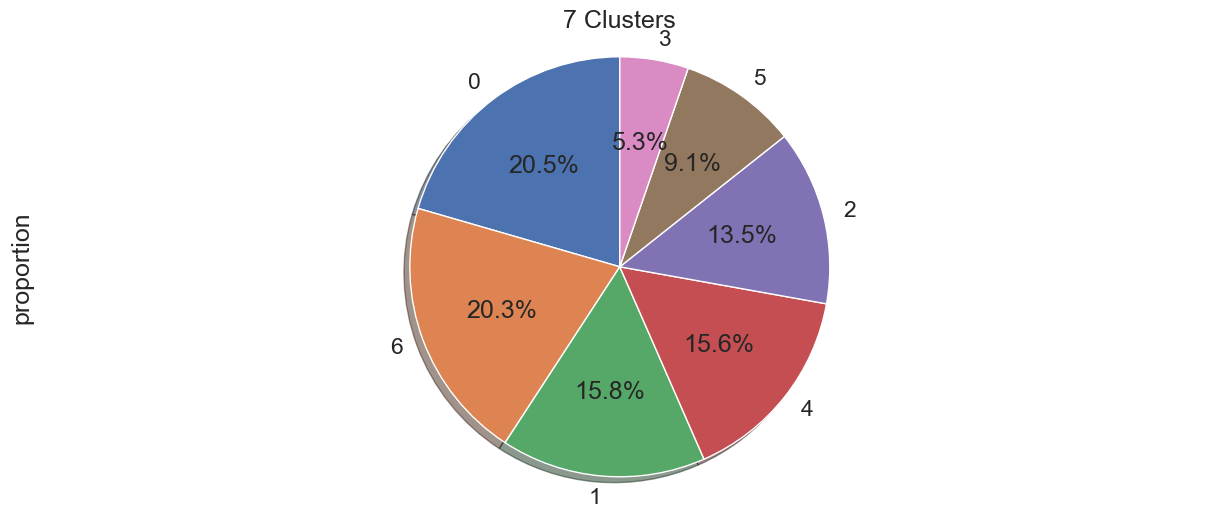

In [21]:
# Vẽ biểu đồ Pie chart cho từng Cluster:

for i in range(3,K_best+1,2):
    customer_history_df1['clusters_'+str(i)].value_counts(normalize=True).plot(
        kind='pie', figsize=(15,6), startangle=90, autopct='%.1f%%', shadow=True)    
    plt.title(str(i)+' Clusters')
    plt.axis('equal')
    plt.show()


In [ ]:
Nhận xét:
+ Độ lớn các cụm ứng với từng K khớp với các ô trong biểu đồ của Sihouette score ở yêu cầu 15
+ K=5 thì các cụm có số lượng đồng đều nhất
+ K=3,7: tạo ra sự khác biệt lớn về số lượng các khách hàng trong các cụm
